# **Music Recommendation System**:

A Project Report
  
Attn:Chief Technical Officer & Business Leadership Team

# Executive Summary:

*What are the most important findings from the analysis done in Milestone? Describe the final proposed model specifications?*

Senior management, the main take away from the work done at the milestone was that all the models suffered in terms of accuracy metrics, but what is more, we found that there are some fundamental problems with only relying on metrics of accuracy in recommendation systems for music. Namely, diversity and novelty are not incorporated in model development and therefore are not present as a performance aspect.   

Moreover, the incorporation of these aforementioned metrics will lead to benefits from a system perspective, a user perspective, a business perspective, and most importantly, an ethical or fairness perspective.  From the system perspective, to quote Castells et al. 2021, "we might say that diversity is not necessarily an opposing goal to accuracy, but in fact a strategy to optimize the gain drawn from accuracy and relevance in matching true user needs in an uncertain environment"  (Castells et al., 2021). From a user perspective, novelty and diversity equate directly to user satisfaction (Castells et al., 2021).  From the business perspective, it is simply good business as increased engagement and satisfaction by means of offering these novel and diverse songs from the long tail will, as a strategy, bring profit from market niches through selling less of more diverse songs resulting in higher profit margins on these relatively inexpensive less known songs (Anderson, 2006). Lastly, feedback loops introduced in popularity-based recommender systems unfairly recommend aritsts that are already making money, but what is more, these popularity-based systems prevent the introduction of new ideas, new artistic expression, and therefore circumvent growth and equity becasue the resultant musical consumption is skewed toward feedback bubble loops.   

Thus, I have come up with a proposed method that first incorporates additional song features to the data set ("vibe", "genre", and "sub-genre") and then runs an Item-Item Collaborative Filtering method to generate the baseline set of recommednations followed, lastly, by a diversity re-ranking objective for the set of generated candidate songs.

Please note, I will briefly mention the problem at the outset, then I will run through the model iterations that were directed as a component of this project, and lastly, I will expand on the specifics of the solution summary and its pertinence to the problem presented herein.

---


C. Anderson, The Long Tail: Why the Future of Business Is Selling Less of More (Hyperion,
2006)

Castells, P., Hurley, N., & Vargas, S. (2021). Novelty and diversity in recommender systems. In Recommender systems handbook (pp. 603-646). New York, NY: Springer US.


# Problem & Solution Summary

**Problem: **

The goal of this project was to increase user engagment for better business outcomes for the long and short term for as many users as possible. The process included building and comparing the performance of multiple recommender models that had been built by extracting data from the "Taste Profile Subset" from the "Million Song Dataset".

The major problems are that not all users are the same, individual users change over time, and to date, most music recommendation systems use a one-size/type-fits all approach.  Importantly, the models that we were instructed to build are tunned and tweaked according to so-called "accuracy metrics".  Accuracy as a prioirty is the standard and can work for some use cases. Precision and recall are binary metircs used to evaluate binary output. Thus, all modelers must choose an arbitray threshold which turns "x" number of play counts into true indicators of relevance, wheras anything below 1.5 play counts are irrelevant.  This assumption is dangerous.  What “interaction” via "play count" means and to what extent it will inhibit future recommendations is context specific.  Here, we assume that anything played above 1.5 is relevant.  We also assume similar user and simlar items infer listening driver commonality on the same grounds, or that the reason WHY user "a" and user "b" choose the same song is because of the artist, but it could be a "vibe" or other listening driver. For example, a song might be played while working out because the beat pushes and this inspires user "a", whereas user "b" simply loves the lyrics or artist.  

Moreover, aside from these dangerous assumptions, the most important finding is that users don't necessarily want accurate predictions.  It is known that "high consumption diversity is strongly associated with important long-term user metrics, such as conversion and retention" in music recommendations systems like Spotify (Adnerson et al.2020).  These authors point out that all users are not the same and over time individual users listening preferences change.  They also show that short term accuracy in similarity based systems are important for intial retention but that diversity in longer temporal scale carries more weight.  There is, indeed, a need for a balancing act to attack the problems presented above.

***Solution Summary:***

First, we must scan the internet for genre and subgenres associated with track listings.  This is the low hanging fruit.  This, in and of itself, will increase the feature dynamics of the songs and provide us power in recommendations when we re-rank according to pairwise intra-list distances (ILD) using the new song features ascribed to them.  Secondly, websites like Neilsen.com already have a metadatabase of music with associated moods.  All Music also has a rich datadabse filled with qualitative hit words describing genre and mood.  Likwise, Moodify has linked with Spotify to such end.  

We will simply incorporate more particulars about songs and input them into new classification categories to enrich the song database, and then, compute for diversity via a re-ranking of the Item-Item list to jointly optimize for relevance and diversity.  Optimization among items is usually preferable to among user in song databases. Currently, we have only the bare bones (song, artist, album, year produced) for song item features.  So, without feature like genre, sub-genre, vibe etc., we will be left to recommending songs by the same artists off other albums which gets old very quickly.  

Although costly upfront, I adovcate allocating funds to further categorizing these songs as advised because our business simply depends on it.  Our competition uses sophisticated fusion models with many more features than our database currently has. To offset the upfront cost of this labeling step, the Long Tailed economic strategy will maxmize margins whereas our copetitors will sell more of popular songs with little margin.  

I will detail the risk and potential costs in the 'Recommendation for Implementation' Section later in the project notebook.  

In brief I propose an Item-Item model to generate the first set of canidate recommendations.  Then I propose we use the intra-list distance metric (ILD), which expresses the set diversity, where the distance between items is a function of item features, namely the newly aformentioned incorporated features. Ziegler et al. 2005 wrote "though being detrimental to average accuracy, we show that our method improves user satisfaction with recommendation lists, in particular for lists generated using the common item-based collaborative filtering algorithm" (Ziegler et al. 2005).

Please find the Problem Defintion and a little about the data dictionary I used to create multiple music recommendation models.  Then please see the coding and the modeling undertaken with observations and annotations throughtout.  Lastly, please find the conclusion with recommendations for the solution and associated implementation protocol at the end of the notebook. You will also find recommendations for further research to this end.

---
Ashton Anderson, Lucas Maystre, Ian Anderson, Rishabh Mehrotra, and Mounia Lalmas. 2020. Algorithmic Effects on the Diversity of Consumption on Spotify. In Proceedings of The Web Conference 2020 (WWW '20). Association for Computing Machinery, New York, NY, USA, 2155–2165. https://doi.org/10.1145/3366423.3380281

C.N. Ziegler, S.M. McNee, J.A. Konstan, G. Lausen, in Proceedings of the 14th International Conference on World Wide Web, WWW 2005 (ACM, New York, NY, USA, 2005), pp. 22–32

# PLEASE NOTE  *RECOMMENDATIONS FOR IMPLEMENTATION* AT END OF NOTEBOOK FOR LOGICAL FLOW

# **Problem Definition**

*Provide the summary of the problem? State the reasons for the proposed solution design? How it would affect the problem/business?*

**The Context:**

 - Why is this problem important to solve?

 Song databases on subscription-based platforms are part of everyday living for many.  We live to music.

 Being able to predict what the user will want to listen to is critical for retaining customers on subscription-based platforms. The competition is fierce and the platform with the most intuitive prediction system is the most valuable to the consumer.  Prediction that increases platform engagement is key, which doesn't necessarily mean that model accuracy is the most important attribute.

**The objective:**

 - What is the intended goal?

 The goal is to build a recoomendation system that can engage the broadest diversity of users for the longest amount of time for the least amount of cost to generate a maximum profit while championing ethical considerations of providing a platform for equity in the probablity of 'artist under-dog' recommendations to the users we engage.  This would mean we make money ethically and increase the range of artistic expression avaiable, the latter, one of the most noble goals for humanity.  As Winston Churchill said "Ill fares the race which fails to salute the arts with the reverence and delight which are their due."

**The key questions:**

- What are the key questions that need to be answered?

 The main question is which model as a whole outperforms or is more suitable for the task at hand.  Secondly, if none the models are suficent to solve the problem, then a how the obejectives can be met otherwise in light of these findings is the most critical question.

**The problem formulation**:

- What is it that we are trying to solve using data science?

Fundamentally, we are trying to predict songs that users will like based of of different modeling approaches.

The nuances of model performance can be tweaked by data science therein providing a more robust recommendation service.  Moreover, models can be fused, or modified to better suit the use case scenario.  Understanding intrisinc bias, underlying assumptions, and other pitfalls can be addressed using computational creativity and that is the nature of Applied Data Science.

# **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

Data Source
http://millionsongdataset.com/

# Importing Libraries and the Dataset

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization
from sklearn.metrics.pairwise import cosine_similarity   # To compute cosine similarity between two vectors

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

# **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project MIT/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project MIT/song_data.csv')


# **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


# **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info


<bound method DataFrame.info of          Unnamed: 0                                   user_id  \
0                 0  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
1                 1  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
2                 2  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
3                 3  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
4                 4  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
...             ...                                       ...   
1999995     1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999996     1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999997     1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999998     1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999999     1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   

                    song_id  play_count  
0        SOAKIMP12A8C130995           1  
1        SOBBMDR12A8C13253B           2  
2        SOBXHDL12A81C204C0           1  
3        SOBYHAJ12A

In [ ]:
# See the info of the song_df data
song_df.info

<bound method DataFrame.info of                    song_id                                title  \
0       SOQMMHC12AB0180CB8                         Silent Night   
1       SOVFVAK12A8C1350D9                          Tanssi vaan   
2       SOGTUKN12AB017F4F1                    No One Could Ever   
3       SOBNYVR12A8C13558C                        Si Vos Querés   
4       SOHSBXH12A8C13B0DF                     Tangle Of Aspens   
...                    ...                                  ...   
999995  SOTXAME12AB018F136                      O Samba Da Vida   
999996  SOXQYIQ12A8C137FBB                         Jago Chhadeo   
999997  SOHODZI12A8C137BB3                              Novemba   
999998  SOLXGOR12A81C21EB7                              Faraday   
999999  SOWXJXQ12AB0189F43  Fernweh feat. Sektion Kuchikäschtli   

                                     release       artist_name  year  
0                      Monster Ballads X-Mas  Faster Pussy cat  2003  
1                    

# Observations and Insights:


We can see from the count dataset that there are 2,000,000 and 4 columns comprised of user_id, song_id, and associated play_count.  

Moreover, we can see from the song data set that there one million rows of data with 5 columns.  The columns are comprised of a song_id, a title, a realse title of the album the song is featured on, the year of release, and the artist name.  

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
# Drop the column 'Unnamed: 0'

## Name the obtained dataframe as "df"
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how="left")
df = df.drop(columns=['Unnamed: 0'], axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


Think About It: As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['user_id'] = enc.fit_transform(df['user_id'])
df['song_id'] = enc.fit_transform(df['song_id'])

**Think About It: **

As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?


A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently. In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

In [ ]:
df_final.tail(50)

,user_id,song_id,play_count,title,release,artist_name,year
1999476,47786,2994,1,Elephant Gun,The Gulag Orkestar,Beirut,2006
1999488,47786,3291,2,Michael,Hell Train,Soltero,0
1999489,47786,3360,1,Lullaby In Three/Four,Monday Morning Cold,Erin McKeown,0
1999490,47786,3362,3,La Petite Mort,Distillation,Erin McKeown,2000
1999500,47786,3551,2,You're A Cad,Ray Guns Are Not Just The Future,the bird and the bee,2009
1999502,47786,3602,2,Superstition,Keep On Your Mean Side,The Kills,2003
1999504,47786,3661,3,Gardenhead / Leave Me Alone,On Avery Island,Neutral Milk Hotel,1992
1999508,47786,3770,2,Me & Mr Jones,Me & Mr Jones,Amy Winehouse,2006
1999510,47786,3801,3,Baby,Ray Guns Are Not Just The Future,the bird and the bee,2009
1999511,47786,3907,2,What's In The Middle,Ray Guns Are Not Just The Future,the bird and the bee,2009


# **Exploratory Data Analysis**

# Let's check the total number of unique users, songs, artists in the data

Total number of unique user id

In [ ]:
# Display total number of unique user_id
print('Number of unique USERS in Raw data = ', df_final['user_id'].nunique())



Number of unique USERS in Raw data =  3155


Total number of unique song id


In [ ]:
print('Number of unique SONGS in Raw data = ', df_final['song_id'].nunique())

Number of unique SONGS in Raw data =  563


Total number of unique artists

In [ ]:
print('Number of unique ARTISTS in Raw data = ', df_final['artist_name'].nunique())

Number of unique ARTISTS in Raw data =  232


Observations:

As can be seen from the three lines of code above, there are 3,155 unique users who have played a total number of 563 unique songs which have been created by a total of 232 unique artists.

# Let's find out about the most interacted songs and interacted users

Most interacted songs

In [ ]:
most_inter_song = df_final.groupby('song_id').size().sort_values(ascending = False)[:10]
most_inter_song

song_id
8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
dtype: int64

Most interacted users

In [ ]:
most_inter_user = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
most_inter_user

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
dtype: int64

Observations:

We can se song id 8582 was most interacted with 751 interactions, while user 61472 has the most interactinos with 243 interactions in the dataset.

Songs played in a year

In [ ]:
# Find out the number of songs played in a year
  # Hint: # Hint: Use groupby function on the 'year' column
count_songs_year = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs_year)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


In [ ]:
df_final.head

<bound method NDFrame.head of          user_id  song_id  play_count                            title  \
200         6958      447           1               Daisy And Prudence   
202         6958      512           1  The Ballad of Michael Valentine   
203         6958      549           1        I Stand Corrected (Album)   
204         6958      703           1            They Might Follow You   
205         6958      719           1                       Monkey Man   
...          ...      ...         ...                              ...   
1999734    47786     9139           1                 Half Of My Heart   
1999736    47786     9186           1            Bitter Sweet Symphony   
1999745    47786     9351           2       The Police And The Private   
1999755    47786     9543           1                     Just Friends   
1999765    47786     9847           1             He Can Only Hold Her   

                       release      artist_name  year  
200               Distill

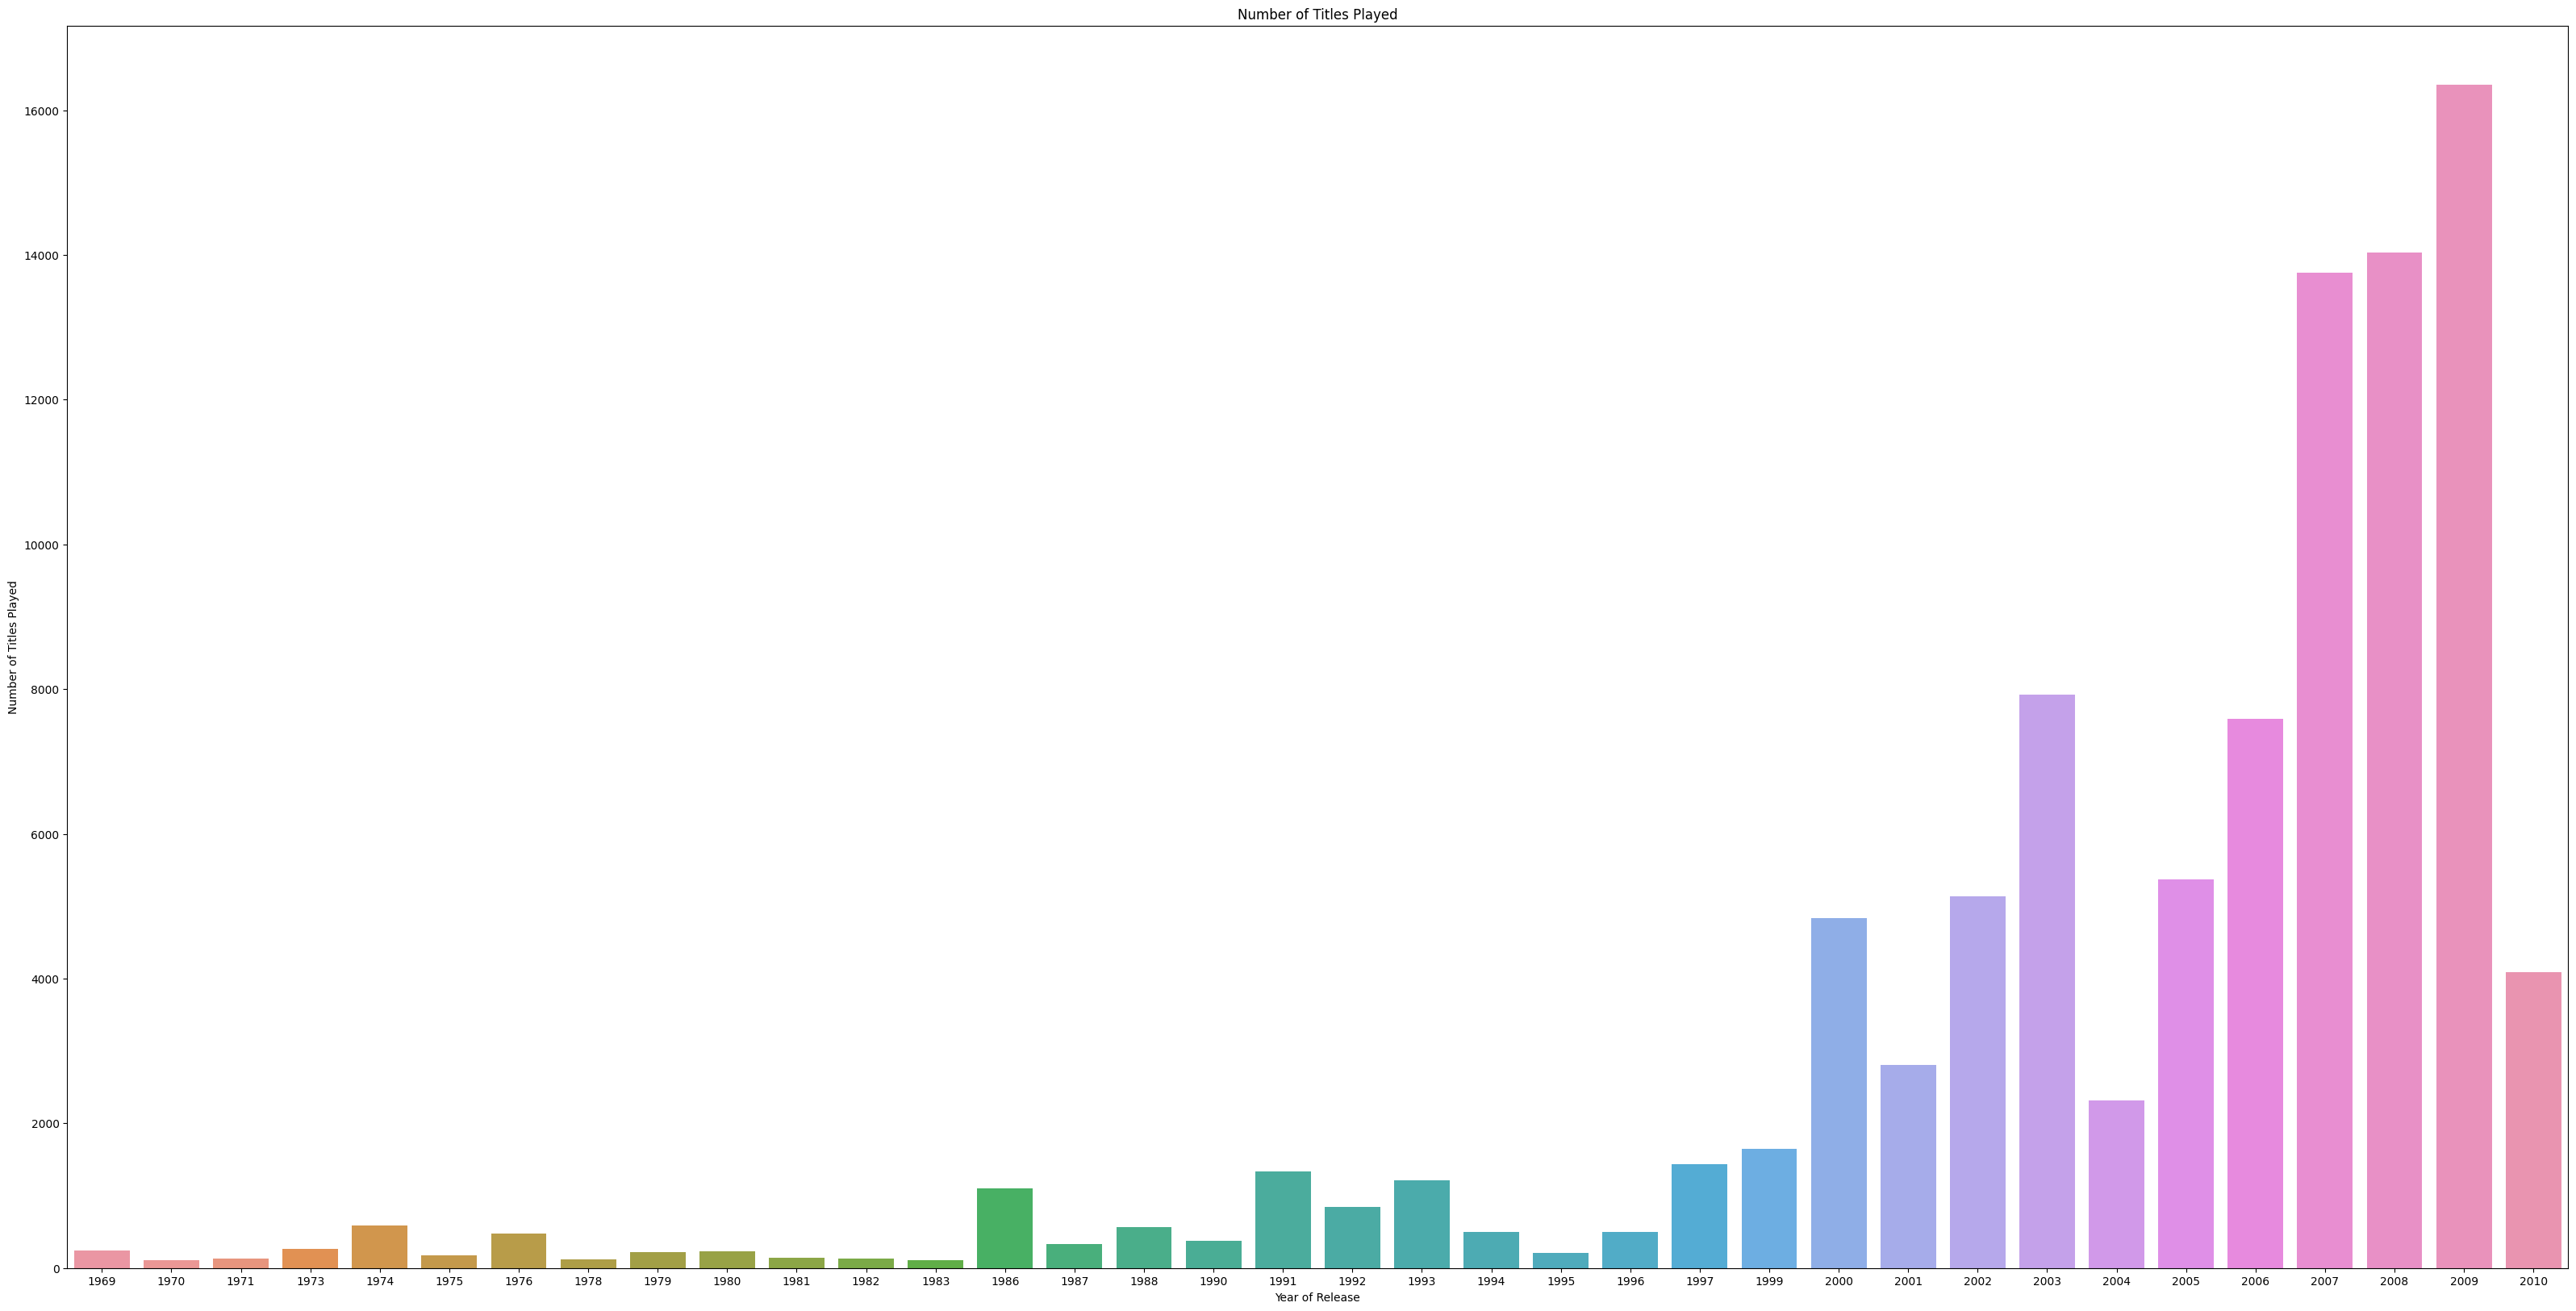

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize = (40, 20))
# Set the x label of the plot
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.xlabel('Year of Release')
# Set the y label of the plot
plt.ylabel('Number of Titles Played')
plt.title('Number of Titles Played')


# Show the plot
plt.show()
# Create the bar plot and provide observations





Observations:
We can see that the counts of titles from 2000 rise sharply.  Also, the golden era of hip-hop 91-93 saw an increase in play counts.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

Note: Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

# Building various models

# Popularity-Based Recommendation Systems

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby('song_id').mean ()['play_count']
print(average_count)


# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_frequency = df_final.groupby('song_id').count()['play_count']
print(play_frequency)

song_id
21      1.622642
22      1.492424
52      1.729216
62      1.728070
93      1.452174
          ...   
9939    1.683983
9942    2.486667
9960    1.597122
9981    1.921053
9989    1.333333
Name: play_count, Length: 563, dtype: float64
song_id
21      265
22      132
52      421
62      114
93      115
       ... 
9939    231
9942    150
9960    139
9981    152
9989    120
Name: play_count, Length: 563, dtype: int64


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_frequency})


# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(final_play, n, min_interaction):
  recommendations = final_play[final_play['play_freq'] > min_interaction]
  recommendations = recommendations.sort_values(by='avg_count', ascending=False)
  return recommendations.index[:n]


In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 175))

[5531, 2220, 614, 352, 1664, 6246, 4448, 1334, 8019, 7496]

# User User Similarity-Based Collaborative Filtering

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
# !pip install surprise
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811602 sha256=ccde938bbf73106de65f97d75c7f7c0fbf4e5fface22e3d40cebecb5862b47e0
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold
# For implementing clustering-based recommendation system
from surprise import CoClustering

# Some useful functions
Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

Think About It: Which metric should be used for this problem to compare different models?

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

Think About It: In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))
# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

# Think About It:

How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}


# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options,verbose=False,random_state = 1)
# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


# Observations:

When I defined the function threshold for the baseline model with 1.5, the output baseline model (version 1) had RMSE=1.0878 on the test set.  For the intuition of precision we had a precision of ~ 0.692, which means about 70% are relevant, actually. For intuition of recall it was retunring ~0.396, meaning that 39% of the songs are recommended. Here, F_1 score of the baseline model is ~0.504. It indicates that weighted average of the preision and recall has lots of room for improvement as we want to be as close to 1 for robust recommendation. Therfore, I changed the threshold to see what would happen.  At 1 it was near perfect, yet that would be giving too much relevance as any item played once would incorporate unitentional and non-repeated songs, the latter, perhaps, more indicative of dislike.  I tried, 1.2 and got the best balance at .538 for the F1 score.  But, for the project I went as directed at the 1.5 level.  



In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(47786, 5894, r_ui=5, verbose = True)

user: 47786      item: 5894       r_ui = 5.00   est = 1.95   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=47786, iid=5894, r_ui=5, est=1.9518354636438349, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user\
def n_users_not_interacted_with(n, data, song_id):
    users_interacted_with_product = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [ ]:
n_users_not_interacted_with(5, df_final, 5894)

[8194, 49157, 32773, 8199, 40969]

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user\
sim_user_user.predict(8194, 5894, r_ui=0, verbose = True)

user: 8194       item: 5894       r_ui = 0.00   est = 1.57   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=5894, r_ui=0, est=1.5748005849741482, details={'actual_k': 40, 'was_impossible': False})

Observations:

Well they are equally poor predictors.  Even the song that was interacted with 5 times by user 47786 led to a predicted play conut of 1.95.  For the user 8194 wih no interaction the prediction is 1.57

*Now, let's try to tune the model and see if we can improve the model performance.*

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10,20,30, 40], 'min_k': [3,6,9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.033089592974137
{'k': 40, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd', 'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options ={'name': 'msd', 'user_based': False}, k = 40 , min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0416
Precision:  0.336
Recall:  0.566
F_1 score:  0.422


Observation:

Well this is got worse but accuracy based on similar user is not necessarily the goal.  

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user.predict(6958, 1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
df.groupby('user_id').get_group(6958)

,user_id,song_id,play_count,title,release,artist_name,year
196,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995
197,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008
198,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008
199,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
...,...,...,...,...,...,...,...
294,6958,9398,1,The World's Greatest,The R. In R&B Greatest Hits Collection Vol. 1,R. Kelly,2001
295,6958,9451,1,Kabul Shit,The Fear,Lily Allen,2009
296,6958,9510,1,Daniel Cowman,Mary Ann meets the Gravediggers and other shor...,Regina Spektor,2002
297,6958,9780,1,Snake,Sings The Greys,Frightened Rabbit,0


In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user.predict(6958, 30, r_ui=0, verbose = True)


user: 6958       item: 30         r_ui = 0.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=30, r_ui=0, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

Oberservatoins:

Well the prediction for user "6958" on "1671" was 1.7, which was close to the actual of 2.  Likewise, the prediciton was 1.7 for the song_id of "30".

Think About It: Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[3, 10, 24, 30, 36]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non visited SONG ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcount'])

,song_id,predicted_playcount
0,9942,2.048219
1,2842,1.949116
2,3050,1.885211
3,4939,1.771190
4,1691,1.743513


# **Correcting the play_counts and Ranking the above songs**

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcount']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_playcount'] = ranked_songs['predicted_playcount'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_playcount', ascending = False)

  return ranked_songs

Think About It: In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_playcount,corrected_playcount
3,9942,150,2.048219,1.966570
2,2842,232,1.949116,1.883463
1,3050,233,1.885211,1.819698
4,4939,133,1.771190,1.684479
0,1691,249,1.743513,1.680140


# ***Observations:***

We can see that the ranking_songs application to the finaly_play has provided a data set with a predicted playcount and a corrected playcount using the intuition of subtracting by one square root to bring the corrected value within closer range of the true mean values, thereby enhancing the prediction.

 Root mean square deviation is commonly used for measures in evaluation of the quality of predictions. It measure how far predictions fall from measured true values. Therefor, corrected playcounts is an imporvement in model performance not yet described by parametes RMSE, precision, and recall, and F1.

# *Item Item Similarity-based collaborative filtering recommendation systems* **bold text**

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance


# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options ={'name': 'cosine', 'user_based': False}, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)
# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


 The model accuracy (RMSE) has shifted dwn from 1.04 to 1.0394, which is an imporvemnt as closer to 0 is best, while the precision has shifted downwards, and the recall has gone up, both slightly.  The F1 has decreased but is less acurrate than the probablity of flipping a coin so it is a poor model, yet.

User-USer model numbers
RMSE: 1.0418
Precision:  0.33
Recall:  0.541
F_1 score:  0.41

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
df.groupby('song_id').get_group(1671)

,user_id,song_id,play_count,title,release,artist_name,year
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
9351,45386,1671,1,Sleeping In (Album),Give Up,Postal Service,2003
13595,22749,1671,1,Sleeping In (Album),Give Up,Postal Service,2003
15504,51415,1671,1,Sleeping In (Album),Give Up,Postal Service,2003
22112,74334,1671,1,Sleeping In (Album),Give Up,Postal Service,2003
...,...,...,...,...,...,...,...
1908629,67765,1671,1,Sleeping In (Album),Give Up,Postal Service,2003
1909779,42427,1671,1,Sleeping In (Album),Give Up,Postal Service,2003
1920487,37911,1671,1,Sleeping In (Album),Give Up,Postal Service,2003
1964017,35114,1671,1,Sleeping In (Album),Give Up,Postal Service,2003


In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6140, 1671)

Prediction(uid=6140, iid=1671, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

Observation:
for 6958 the actual play count was 2 and the predicted was 1.36, whereas the prediction of user 6140 play count was 1.69 for song 1671.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10,20,30], 'min_k': [3,6,9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
gs.fit(data)


# Find the best RMSE score
print(gs.best_score['rmse'])
# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

Think About It: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters here.

In [ ]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd', 'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options={'name': 'msd', 'user_based': False}, k=30, min_k=6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0423
Precision:  0.34
Recall:  0.563
F_1 score:  0.424


Observatoins:

We can see the accuracy has gotten worse, the precision stronger and the recall stronger with a f1 of .424 versus .397 below.  A marginal gain.

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.3319659681769878, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.4746440368585654, details={'actual_k': 20, 'was_impossible': False})

Observations:

Well for the known actual play count of 2 for song 1671 by 6958 the 1.33 prediction is a bit off.  The user-user model is better with a 1.8 prediciton.

For the song id 3232 without interaction we have a 1.47.

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k=5)

[3, 10, 24, 30, 36]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 47786, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcount'])

,song_id,predicted_playcount
0,6226,2.483639
1,6103,2.443825
2,5138,2.423693
3,7338,2.327327
4,861,2.319374


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_playcount,corrected_playcount
4,6226,122,2.483639,2.393104
2,6103,196,2.443825,2.372397
0,5138,372,2.423693,2.371846
1,7338,198,2.327327,2.256260
3,861,126,2.319374,2.230287


OBSERVaTIONS:
What's clear is the correction is much less in terms of degrees of change from the predicted playcount of the User-User model.

# Model Based Collaborative Filtering - Matrix Factorization
Model-based Collaborative Filtering is a personalized recommendation system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use latent features to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# to see which user id is not associated with 3232 by deduction
df.groupby('song_id').get_group(3232)

,user_id,song_id,play_count,title,release,artist_name,year
473,27018,3232,2,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008
14230,69587,3232,1,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008
24925,2399,3232,1,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008
49597,39613,3232,2,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008
75803,40245,3232,1,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008
...,...,...,...,...,...,...,...
1947290,22588,3232,1,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008
1957040,8986,3232,1,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008
1966257,21484,3232,2,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008
1982595,30034,3232,1,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(4160, 3232, verbose = True)

user: 4160       item: 3232       r_ui = None   est = 1.68   {'was_impossible': False}


Prediction(uid=4160, iid=3232, r_ui=None, est=1.683210478325189, details={'was_impossible': False})

Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)
# Best RMSE score
print(gs_.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])



1.0132501332717796
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


Think About It: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters here.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
# Build the optimized SVD model using optimal hyperparameter search. Use random_state = 1
svd_optimized = SVD(n_epochs= 30, lr_all=0.01, reg_all=0.2, random_state =1)

# Train the algorithm on the train set
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


Well, the f1 has improved over the base SVD model performance numbers featured below herein.  Yet an F1 is barely better than predicting a coin.  Marginal gain.  Still worse than baseline USer-User model at .504, but basicallly the same.

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498

Think About It: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters here.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, r_ui=5, verbose=True)

user: 6958       item: 3232       r_ui = 5.00   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=5, est=1.4425484461176483, details={'was_impossible': False})

Well, 6958 for song 1671 on the baseline SVD model was 1.27 and was improved by the SVD optimized model to 1.34.  the true value was 2.  

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_playcount,corrected_playcount
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


OBSERVATION:

The corrected playcount has a neglibgible difference from the predicted playcount.  This probably has to do with the underlying assumptions in the baseline model and the arbitray threshold and other paramter settings.  What can be seen is that models with better predictions (i.e. User-User) have a larger degree of change between predicted playcount and corrected playcount.



# Cluster Based Recommendation System
In clustering-based recommendation systems, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
cluster_baseline = CoClustering(random_state = 1)
cluster_baseline.fit(trainset)
precision_recall_at_k(cluster_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
cluster_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
cluster_baseline.predict(6958, 3232, r_ui = 0, verbose = True)

user: 6958       item: 3232       r_ui = 0.00   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=0, est=1.4785259100797417, details={'was_impossible': False})

# Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv =3, n_jobs = -1)
# Fitting data
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv =3, n_jobs = -1)

gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0598398891900427
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


# Think About It:
How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters here.

In [ ]:
# Train the tuned Coclustering algorithm
cluster_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

cluster_tuned.fit(trainset)

precision_recall_at_k(cluster_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


Observations:

This may be the worst model yet.  

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
cluster_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and so
cluster_tuned.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

OBSERVATIONS:

 the optimized coclustering model has low accuracy metrics, yet for user id 6958 the performance of the base cocluster is on par with the User-User Model.

# Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, cluster_tuned)

# Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_playcount,corrected_playcount
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


# Content Based Recommendation Systems

Think About It: So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small = pd.DataFrame({
    'user_id': df_final['user_id'],
    'song_id': df_final['song_id'],
    'play_count': df_final['play_count'],
    'title': df_final['title'],
    'artist_name': df_final['artist_name'],
    'text': df_final['title'] + ' ' + df_final['release'] + ' ' + df_final['artist_name']
})
df_small.info

<bound method DataFrame.info of          user_id  song_id  play_count                            title  \
200         6958      447           1               Daisy And Prudence   
202         6958      512           1  The Ballad of Michael Valentine   
203         6958      549           1        I Stand Corrected (Album)   
204         6958      703           1            They Might Follow You   
205         6958      719           1                       Monkey Man   
...          ...      ...         ...                              ...   
1999734    47786     9139           1                 Half Of My Heart   
1999736    47786     9186           1            Bitter Sweet Symphony   
1999745    47786     9351           2       The Police And The Private   
1999755    47786     9543           1                     Just Friends   
1999765    47786     9847           1             He Can Only Hold Her   

             artist_name                                               text  
2

In [ ]:
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset='title')

In [ ]:
# Set the title column as the index
df_small = df_small.set_index('title')

In [ ]:
# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,artist_name,text
title,,,,,
Daisy And Prudence,6958,447,1,Erin McKeown,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Killers,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,Vampire Weekend,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,Tiny Vipers,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Amy Winehouse,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a function to pre-process the text data:

In [ ]:
# Create a function to tokenize the text
def tokenize(text):
  text = re.sub(r"[^a-zA-Z]"," ", text.lower())
  tokens = word_tokenize(text) #extraction process
  #removal of stopwords
  words = [word for word in tokens if word not in stopwords.words("english")]
  text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]
  return text_lems
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

***Finally, let's create a function to find most similar songs to recommend for a given song.***

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    recommended_songs = []


    # Getting the index of the song that matches the title
    indices = pd.Series(df_small.index)
    idx = indices[indices == title].index[0]
    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

# **OBSERVATIONS:**

Well, 'Everlong', 'The Pretender', and "All the Pretty Faces' are songs by the Foo Fighters.  Some of the songs are by the Killers, a group similar in style.  This shows good agreement in recommendation and there's even some diversity in there.  The logic in the diversity recomendation is unkown.

# **Conclusion and Recommendations**

# Conclusion and Recommendations.

1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):

*Firstly, the ideal metric of success must incorporate both accuracy and diversity metrics and be flexible enough for the user in queston to provide personalized recommendatoins across temporal continums as the user's preferences changes.*  F1 and other accuracy metrics for music recommendations will likely lead to poor model performance (Zeigler et al., 2005; Castells et al., 2022)

***Popularity-Based Recommendation System***
This model is fast in terms of computation.  It simly adds and ranks based on play counts.

However, this model doesn't offer any probablistic inference in terms of what a user might want to listen to without the machine learning aspect.

***User-User Similarity-Based Collaborative Filtering:***
This approach resulted in a model that used similarities among user's play selection to predict songs that a prospective user might like. Even though the RMSE improved, the most important single parameter would be precision as it details the percentage of recommended items that are actually relevant to the user. That said, accuracy based metrics aren't enough because user engaement is likely dependent on hearing new music which indcludes diversity.   

***Baseline metrics:***

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Optimized Performance:**

RMSE: 1.0411
Precision:  0.327
Recall:  0.544
F_1 score:  0.408

***Optimized User-User Recommmendation for User 6958 with Song 1671 ***

r_ui = 2.00   
est = 1.80

This optimized performance is pretty good where 1.8 prediction is sightly off a true value of 2.

***Item-Item Similarity-Based Collaborative Filtering***
The user-user model looked for similarity between users, whereas this model looks for similarity among items. Baseline has a better RMSE, worse precision at 33% and better recall at 56%.  In theory and practice, if we recommended a lot of songs with great diversity, or dissimilarity, we would present less localised song selections than a highly accurate and over-localised selection list derived from a so-called "accurate and good model", in addition to likely "desirable" new music selections. Of the two featured below I would use the optimized one.  I will detail the best solution (not yet modeled) in the solutions summary below.

***Baseline metrics******TEM ITEM:***

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397

***Baseline Recommmendation for Item Item with user 6958 with Song 1671 ***

r_ui = 2.00   
est = 1.36


**OPTIMIZED ITEM ITEM:**

RMSE: 1.0423
Precision:  0.34
Recall:  0.563
F_1 score:  0.424

***Optimized Recommmendation for Item Item with user 6958 with Song 1671 ***

r_ui = 2.00   
est = 1.33

The baseline Item-Item performed poorly as was the optimized performance.


***Model Based Collaborative Filtering - Matrix Factorization (SVD)***
This model uses information from the single user only, but uses latent features to create a personalized set of predictions.  So far the optimized version of this dispalys the best accuracy metrics, yet its perfomrance is not as good as the User- USer baseline model. Sparsity and scalability can be the biggest two challenges with collabrative filtering methods, where this model decomposes the original sparse matrix to low-dimensional matrices with latent features and less sparsity to overcome the disadvantages.

***Baseline metrics:***
RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498

***Baseline Recommmendation for SVD for user 6958 with Song 1671 ***

r_ui = 2.00   
est = 1.27

OPTIMIZED SVD MODEL

MSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502

***Optimized Recommmendation for SVD for user 6958 with Song 1671 ***

r_ui = 2.00   
est = 1.34

The baseline SVD performed poorly as was the optimized performance.

***Cluster Based Recommendation System***
This model clusters similar users, defined by similarity in song selection, and recommends songs to a user based on play counts from other users in the same cluster.  We observe the optimization process made the model worse by increasiing the RMSE and lowering the F1.

***BASELINE CLUSTER:***
RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472

***Baseline Recommmendation for Item Item with user 6958 with Song 1671 ***

r_ui = 2.00   
est = 1.29


***Optimized Cluster: ***

RMSE: 1.0695
Precision:  0.392
Recall:  0.559
F_1 score:  0.461

***Optimized Recommmendation for Item Item with user 6958 with Song 1671 ***

r_ui = 2.00   
est = 1.20

The baseline Cluster model performed poorly as was the optimized performance.

***Content Based Recommendation Systems***
This model retrieves songs based on how a user interacts with content, in this case songs, utlizing song features like artist or album.

This model has accuracy in terms of songs recommended by the same artist, yet, one of the most desirable functionaliites of a recommendation system is hearing new music that one likes.  This model could be improved if categories like genre, sub-genre, and mood were included, thereby increasing the diveristy of recommendatoins and probablility of new good hits outside of the artists known.


2. Refined insights:

*What are the most meaningful insights from the data relevant to the problem?*

I believe the most meaningful insight is that collaborative-based models that focus on increasing model accuracy metrics as the sigular goal in workflow will not neccessarily tranlate to best business outcomes.

When the collaborative recommender system is focused on accuracy only, it often can lead to a lack of diversity known as "filtering bubbles". For example, if a listner is a big Grrateful Dead fan, and listens to them 80% of the time, they likely don't want to hear anymore recommendations of them and are familiar with the repetoire already. Thus, the importance of  diversity needs some consideration in recommendations systems for this business case.  

The above hyothetical is a problem derived from localised/concentrated and excessively accurate recommendations in collabrotive based models where user interface and/or content based interface is the driving variable.  The irony is the accuracy of the models above are pretty low despite all the work in tunning and computation.  If we recommend that which the user already listens to, they may find little to no value in the system.  

I believe it is therefore worthwhile considering a diversity metric for re-ranking the recommended and appending thre more columns; genres, sub-genres, and "vibe" to the original dataset.

3. Proposal for the final solution design:


*What model do you propose to be adopted? Why is this the best solution to adopt?*


**PLEASE SEE RECOMMENDATIONS FOR IMPLEMENTATION BELOW & PROBLEM AND SOLUTION SUMMARY AT BEGINNING OF THE NOTEBOOK**



# Recommendations for Implementation -

*What are some key recommendations to implement the solution? What are the key actionables for stakeholders? What is the expected benefit and/or costs (List the benefits of the solution. State some rational assumptions to put forward some numbers on costs/benefits for stakeholders)? What are the potential risks or challenges of the proposed solution design? What further analysis needs to be done or what other associated problems need to be solved?*

The key recomendations for solution implementation are as follows:

-Allocate money towards appending the
dataset with additional features: "genre", "sub-genre", "vibe". This information is freely avaiable and can likely be appended relatively easily to the final song selection. The executive sumary lists the beenfits of diversity from system persepctive to economics.

-Cost: additional workflow and costs.
- Benetfit:  upfront cost will lead to long-term gains.  Without modifcation we risk going out of business because no one wants to hear the same thing repeatedly.

- Additional Benefits: increased user satisfaction, increased retention, increased engagement, bigger margins from long tail strategy, potential to refine model for different clusters of users as time goes by and we learn more.

-Risk: Any singular approach risks missing out on catering to a set of user types.
- Benefit: The proposed two-stage User-User approach to generate a canidate list of songs followed by a diversity objective re-ranking step should maximize the accuracy from the User-User model and bring novelty to the recommendation system such that we have both a personalized experience and simulataneously encourage our users to experience more.

- Benefit: Ethical consdieraton in providing the 'under-dog" of music a platform is a great marketing story

-Further analysis/research: Time affects on both user preference and user diversity consumption with the day, between the days, and between the years is a major factor to consider and research. Take for instance a book recommendation for the moring or evening, it is likely the same.  Users of music platforms employ different music for different scenarios, and thus, there is room for continous improvement which should also be seen as an opportunity to create a bespoke platform to outperform competitors.







